In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np
from obspy import read
from src.pyoad.pyoad import read_data_24bit, save2mseed
# from pyoad import read_data_24bit, save2mseed

Check what is the difference between shro 905, 910, ...

It seems like the number of bytes to skip is different. instead of +3 I might need to use +2/

In [60]:
records_range = np.arange(10,13,1)


# file_name = '/Users/gilaverbuch/dev/pyOAD/Results/shru905/05140537.D21'
# header_df_905, waveforms_905 = read_data_24bit(file_name, records_range)

file_name = '/Users/gilaverbuch/dev/pyOAD/Results/shru910/10090347.D17'
header_df_910, waveforms_910 = read_data_24bit(file_name, records_range)

# file_name = '/Users/gilaverbuch/dev/pyOAD/Results/shru917/10100631.D17'
# header_df_917, waveforms_917 = read_data_24bit(file_name, records_range)

# save2mseed(waveforms)

Reading waveform records...


100%|█████████████████████████████████████████████| 3/3 [00:04<00:00,  1.59s/it]


In [61]:
print(header_df_905)
print(waveforms_905[0])
print(waveforms_905[4])

                                         0
shru_num                               905
channels                                 4
npts                               1048576
reclen                            12583936
sampling_rate                     19531.25
delta                             0.000051
starttime      2021-05-14T05:37:58.850125Z
endtime        2021-05-14T05:38:52.537216Z
internal_temp                         11.4
bat_voltage                           13.7
bat_current                            5.3
vla                       Phone sens=-170 
hla                       Phone sens=-170 
SR905.CHN01..FDH | 2021-05-14T05:55:52.591949Z - 2021-05-14T05:56:46.278989Z | 19531.2 Hz, 1048576 samples
SR905.CHN01..FDH | 2021-05-14T05:56:46.279040Z - 2021-05-14T05:57:39.966080Z | 19531.2 Hz, 1048576 samples


In [62]:
print(header_df_910)
print(waveforms_910[0])
print(waveforms_910[4])

                                         0
shru_num                               910
channels                                 4
npts                               1048576
reclen                             8389632
sampling_rate                     9765.625
delta                             0.000102
starttime      2017-10-09T03:47:55.307975Z
endtime        2017-10-09T03:49:42.682157Z
internal_temp                         21.2
bat_voltage                           10.9
bat_current                            5.3
vla                       Phone sens=-170 
hla                       Phone sens=-170 
SR910.CHN01..FDH | 2017-10-09T04:05:49.049799Z - 2017-10-09T04:07:36.423879Z | 9765.6 Hz, 1048576 samples
SR910.CHN01..FDH | 2017-10-09T04:07:36.423981Z - 2017-10-09T04:09:23.798061Z | 9765.6 Hz, 1048576 samples


In [63]:
print(header_df_917)
print(waveforms_917[0])
print(waveforms_917[4])

                                         0
shru_num                               917
channels                                 4
npts                               1048576
reclen                             8389632
sampling_rate                     9765.625
delta                             0.000102
starttime      2017-10-10T06:31:22.575225Z
endtime        2017-10-10T06:33:09.949407Z
internal_temp                         20.6
bat_voltage                           10.8
bat_current                            5.3
vla                       Phone sens=-170 
hla                       Phone sens=-170 
SR917.CHN01..FDH | 2017-10-10T10:06:07.477113Z - 2017-10-10T10:07:54.851193Z | 9765.6 Hz, 1048576 samples
SR917.CHN01..FDH | 2017-10-10T10:07:54.851295Z - 2017-10-10T10:09:42.225375Z | 9765.6 Hz, 1048576 samples


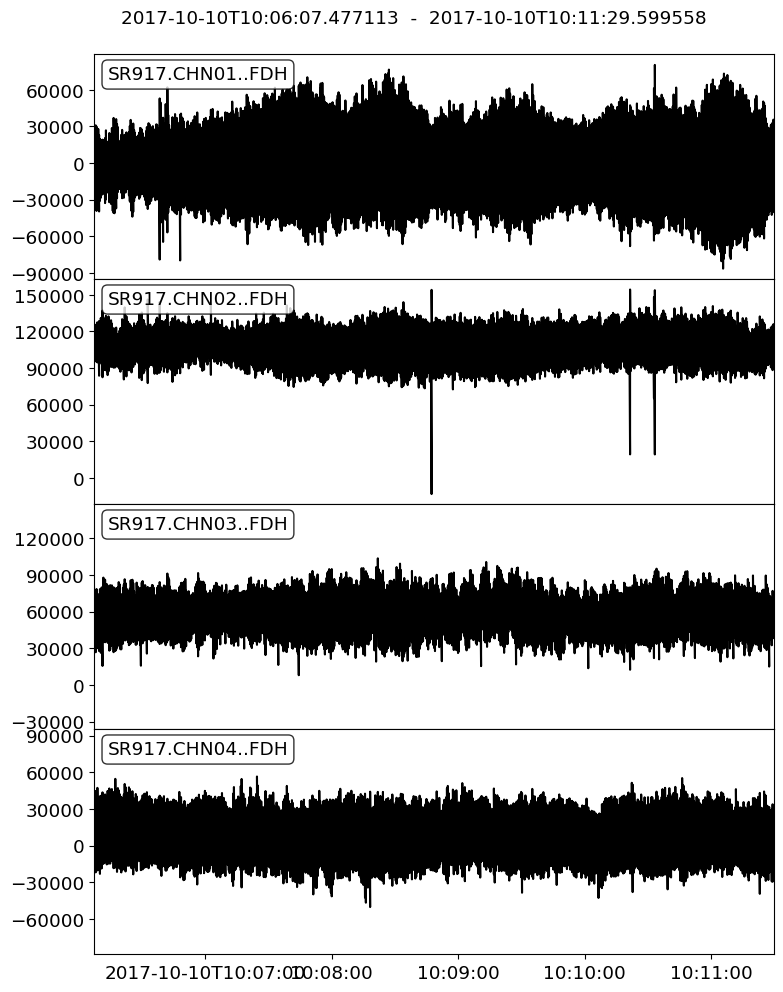

In [64]:
waveforms_917.plot();

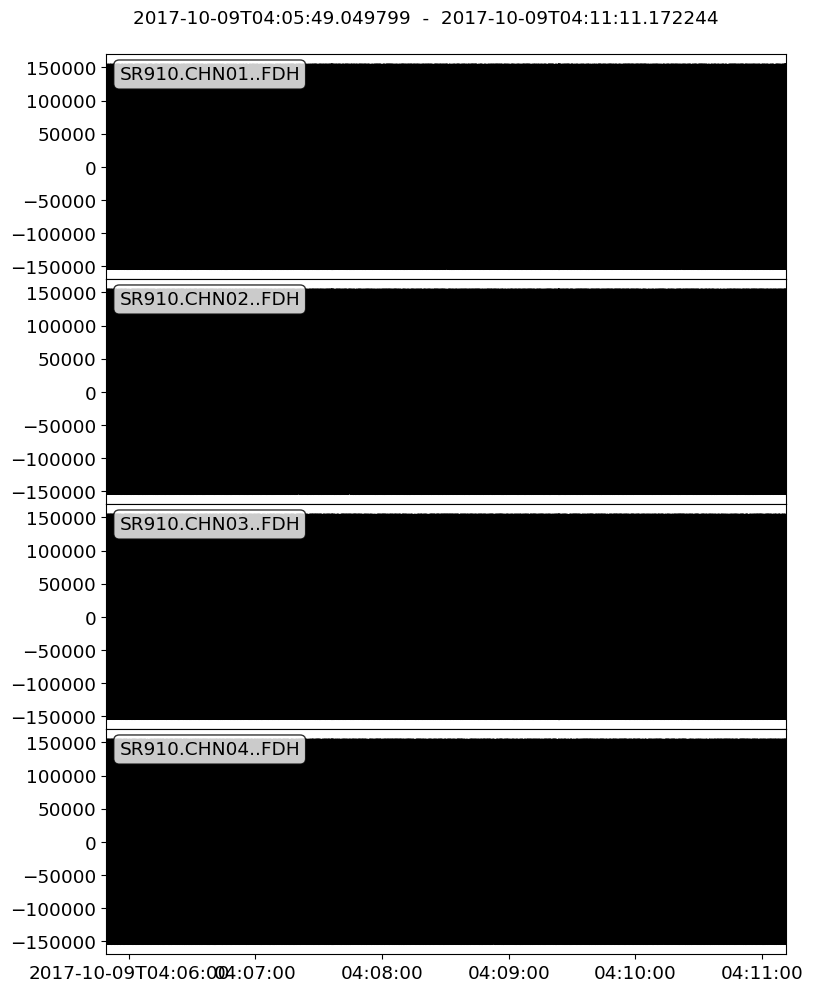

In [66]:
waveforms_910.plot();

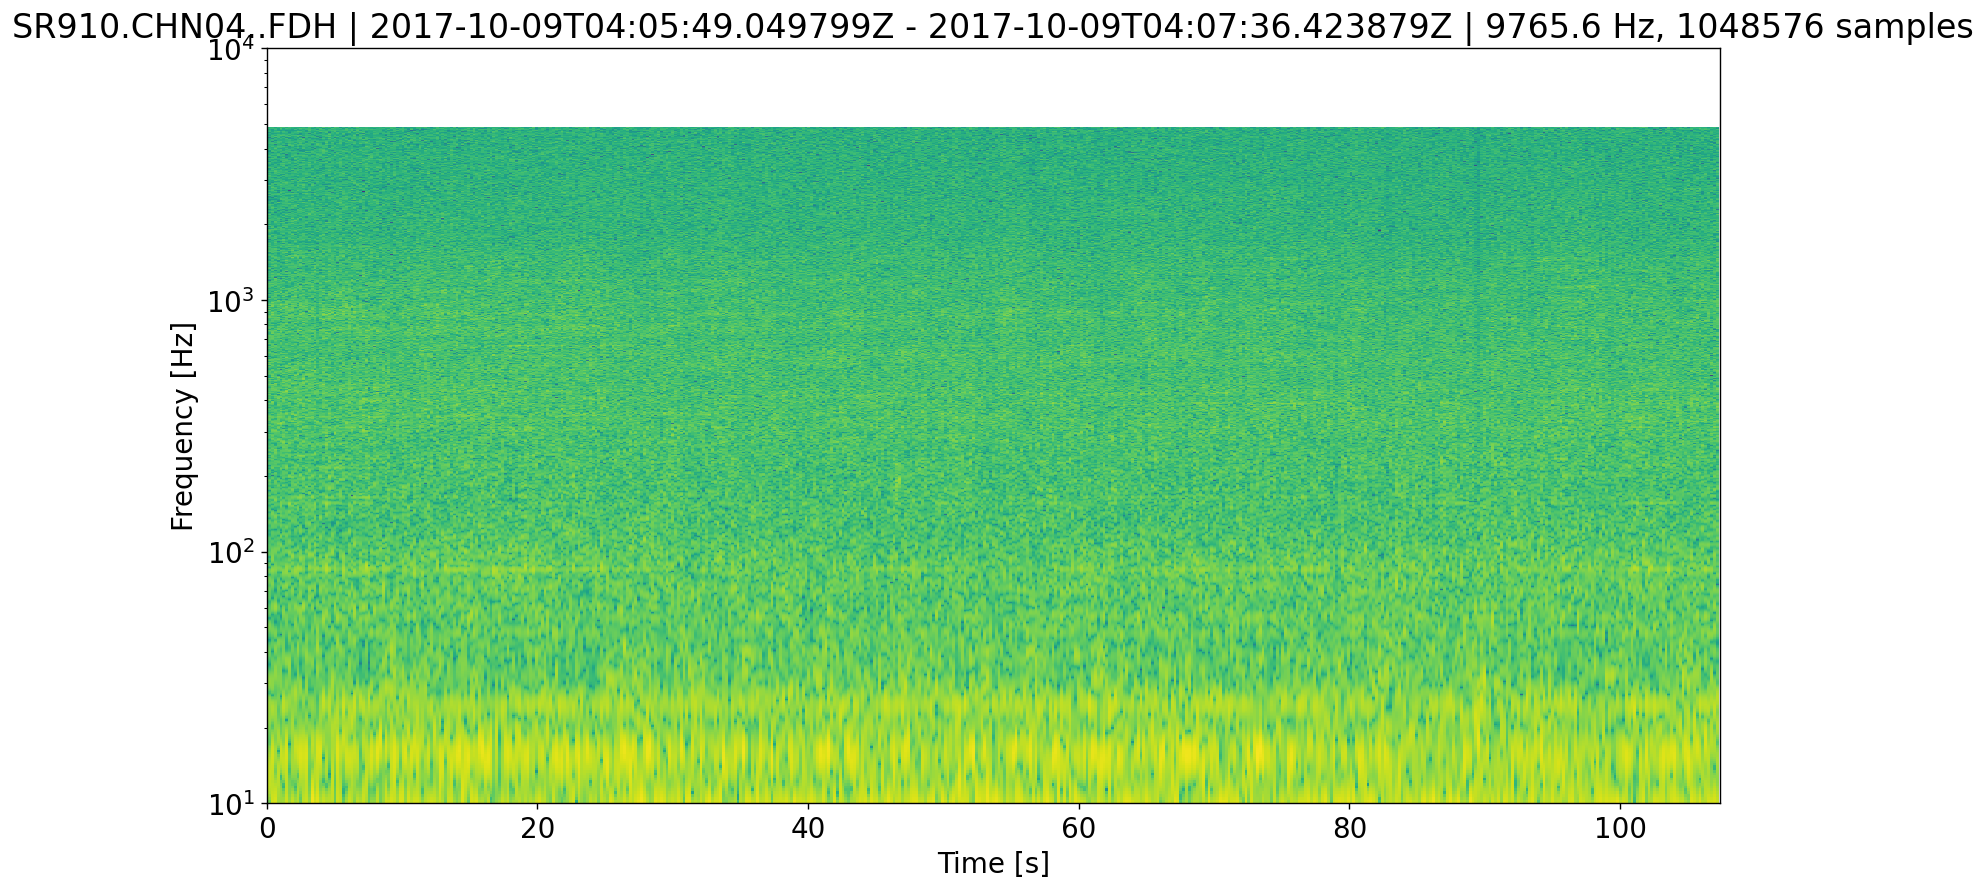

In [67]:
fig = waveforms_910[3].spectrogram(wlen=0.5, per_lap=0.5, log=True, dbscale=True, show=False);
fig.set_figheight(8)
fig.set_figwidth(15)
plt.ylim(1e1, 1e4)
# plt.xlim(20,30)
plt.show()

In [47]:
waveforms2 = waveforms_917.copy()
waveforms2.merge(method=1, interpolation_samples=0)

4 Trace(s) in Stream:
SR917.CHN01..FDH | 2017-10-10T03:18:06.163523Z - 2017-10-10T03:23:28.285968Z | 9765.6 Hz, 3145728 samples
SR917.CHN02..FDH | 2017-10-10T03:18:06.163523Z - 2017-10-10T03:23:28.285968Z | 9765.6 Hz, 3145728 samples
SR917.CHN03..FDH | 2017-10-10T03:18:06.163523Z - 2017-10-10T03:23:28.285968Z | 9765.6 Hz, 3145728 samples
SR917.CHN04..FDH | 2017-10-10T03:18:06.163523Z - 2017-10-10T03:23:28.285968Z | 9765.6 Hz, 3145728 samples

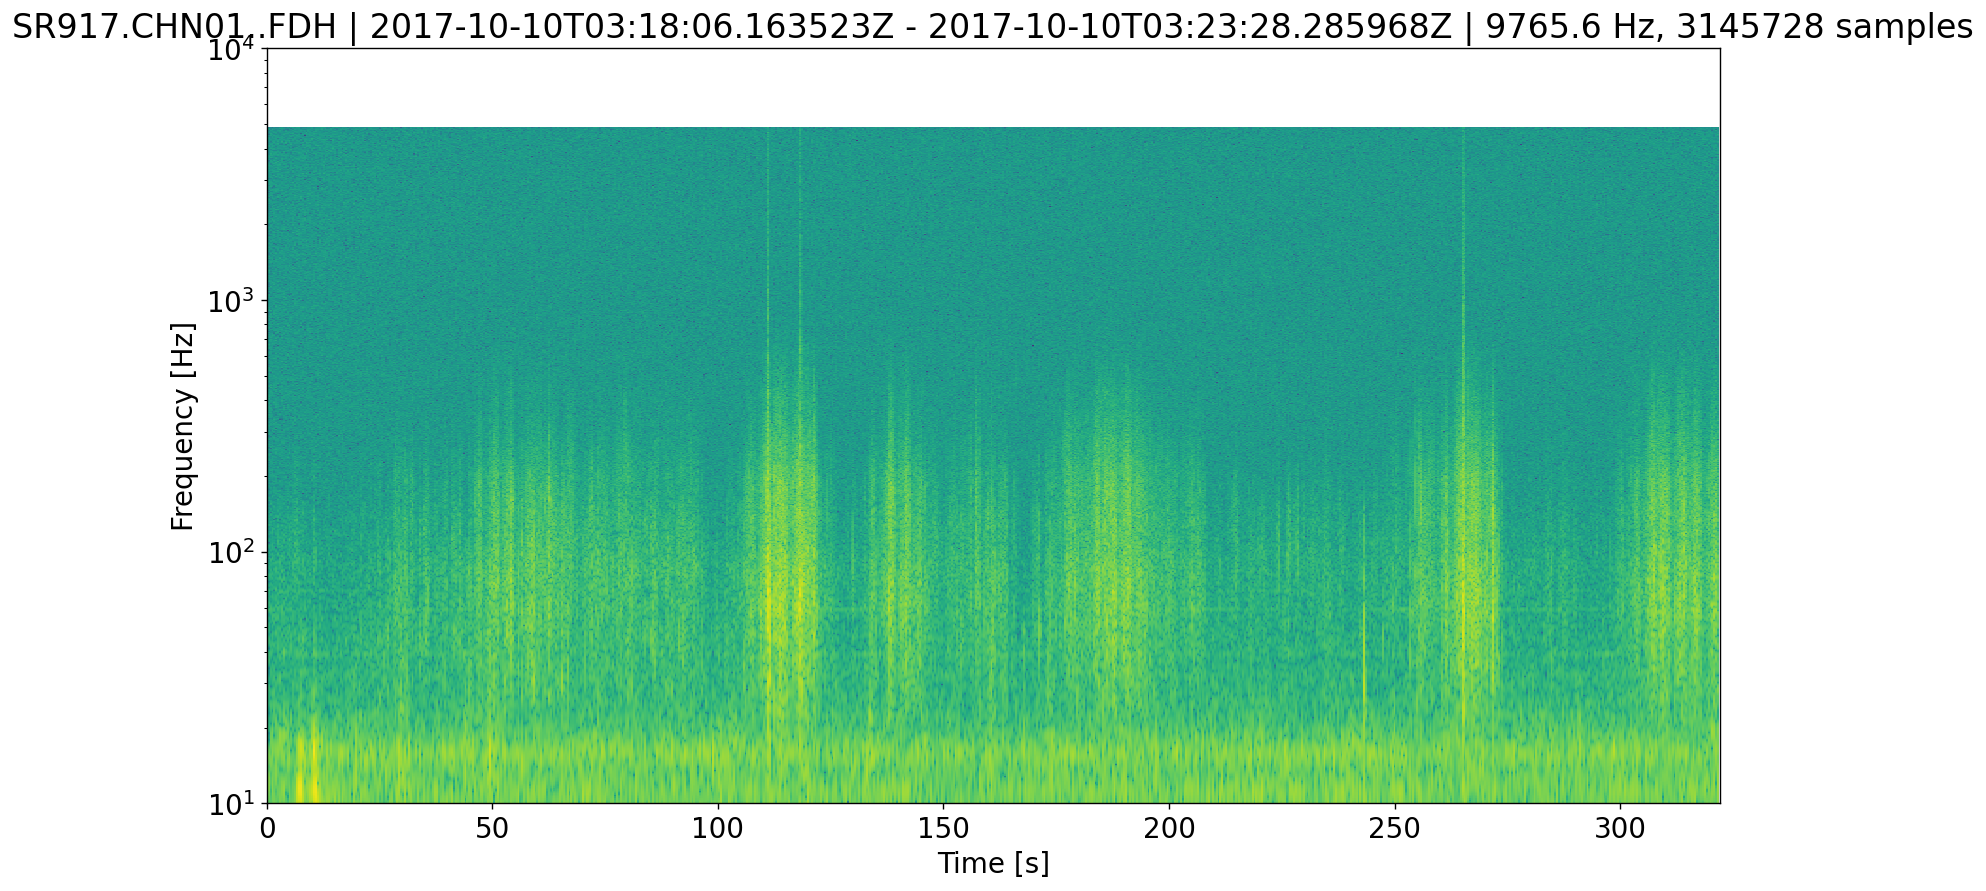

In [49]:
fig = waveforms2[0].spectrogram(wlen=1, per_lap=0.5, log=True, dbscale=True, show=False);
fig.set_figheight(8)
fig.set_figwidth(15)
plt.ylim(1e1, 1e4)
# plt.xlim(20,30)
plt.show()

In [ ]:
test = read('Results/2021/SR905/CHN01/SR905.CHN01..FDH.2021.134.5.37.58')
fig = test[0].spectrogram(wlen=1, per_lap=0.5, log=True, dbscale=True, show=False);
fig.set_figheight(8)
fig.set_figwidth(15)
plt.ylim(1e1, 1e4)
# plt.xlim(20,30)
plt.show()

# Data from YT's matlab code

In [ ]:
tr_rec1 = waveforms[0].copy() 
tr_rec2 = waveforms[1].copy()
tr_rec3 = waveforms[2].copy()

tr_ch1_rec2 = waveforms[4].copy()

In [ ]:
samp_freq = 19531.25
dt = 1/samp_freq
time_p = np.arange(0, tr_rec1.stats.npts*dt, dt)

In [ ]:
matlab_channel1_rec1 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel1_rec1.scv')
matlab_channel2_rec1 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel2_rec1.scv')
matlab_channel3_rec1 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel3_rec1.scv')

matlab_channel1_rec2 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel1_rec2.scv')

# Header = read_header()

In [ ]:
len(matlab_channel1_rec1), len(tr_rec1.data)

In [ ]:
samp_freq = 19531.25
dt = 1/samp_freq
time_m = np.arange(0, len(matlab_channel1_rec2)*dt, dt)


plt.figure(figsize = (15,5))
plt.plot(time_m, matlab_channel1_rec2, 'r')
plt.plot(time_p, tr_ch1_rec2.data, 'g')

# plt.plot(time_m, matlab_channel1_rec1, 'r')
# plt.plot(time_p, tr_rec1.data, 'g')
plt.xlim(20,20.1)
plt.ylim(-2e5, 2e5)
plt.show()

In [ ]:
(2.5/(2**23)/20)

In [ ]:
sensitivity/3.1623e+08

In [1]:
(2.8**2 + 1.2**2)**0.5

3.046309242345563

In [ ]:

f, t, Sxx = signal.spectrogram(matlab_channel, samp_freq, nperseg=int(samp_freq), noverlap=int(samp_freq//2))
plt.figure(figsize=(10,5))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.xlim(10,20)
plt.ylim(0,200)
plt.clim(0,1e-9)
plt.colorbar()
plt.title('from matlab')
plt.show()

In [ ]:
samp_freq = 19531.25
dt = 1/samp_freq
time_m = np.arange(0, len(matlab_channel)*dt, dt)

plt.figure(figsize = (15,5))
plt.plot(time_m, matlab_channel*1e-4, 'r')

plt.show()

In [ ]:
samp_freq = 19531.25
dt = 1/samp_freq
time_p = np.arange(0, len(channel1)*dt, dt)

plt.figure(figsize = (15,5))
plt.plot(time_p, channel1, 'g')
# plt.plot(time_p, channel2*2.5e2, 'r')
# plt.xlim(5.8,6)
plt.show()

In [ ]:
channel1 = np.asarray(channel1, dtype=np.float32)

In [ ]:
len(matlab_channel) / len(channel1)

In [ ]:
start = time.time()

channel1 = get_data(x, pos, l)

end  = time.time()
print ("Time elapsed:", end - start)

In [ ]:
pos = 1024
l = (len(x[1024:])//128)
npts = 1048576

l1 = l*0
l2 = l1+l
def get_data(x, pos, l):
    
    data=[]
    for loc in range(l1+pos,l2, 12):
    
        d = bytearray(x[loc:loc+3])
        d.append(0)
        dpoint = int.from_bytes(d, byteorder='big', signed=True) * (2.5/(2**23)/20)
        data.append(dpoint)
    
    return data
    
    

In [ ]:
xs = bytearray(b'\x00\x1b\xcf')
xs.append(0)
print(xs)
struct.unpack('>i', b'\x00\x1b\xcf\x00')[0], int.from_bytes(xs, byteorder='big', signed=True)